In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('stock_prices.csv')

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None
                open           high            low          close  \
count  497461.000000  497464.000000  497464.000000  497472.000000   
mean       86.352275      87.132562      85.552467      86.369082   
std       101.471228     102.312062     100.570957     101.472407   
min         1.620000       1.690000       1.500000       1.590000   
25%        41.690000      42.090000      41.280000      41.703750   
50%        64.970000      65.560000      64.353700      64.980000 

In [4]:
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)

In [5]:
data.dropna(inplace=True)

In [6]:
data['Daily Return']=data['close'].pct_change()# Calcutaing Daily Returns

In [7]:
data['SMA_7']=data['close'].rolling(window=7).mean()  #Calclating moving averages
data['SMA_30']=data['close'].rolling(window=30).mean()

In [8]:
data['Volatality']=data['Daily Return'].rolling(window=30).std()

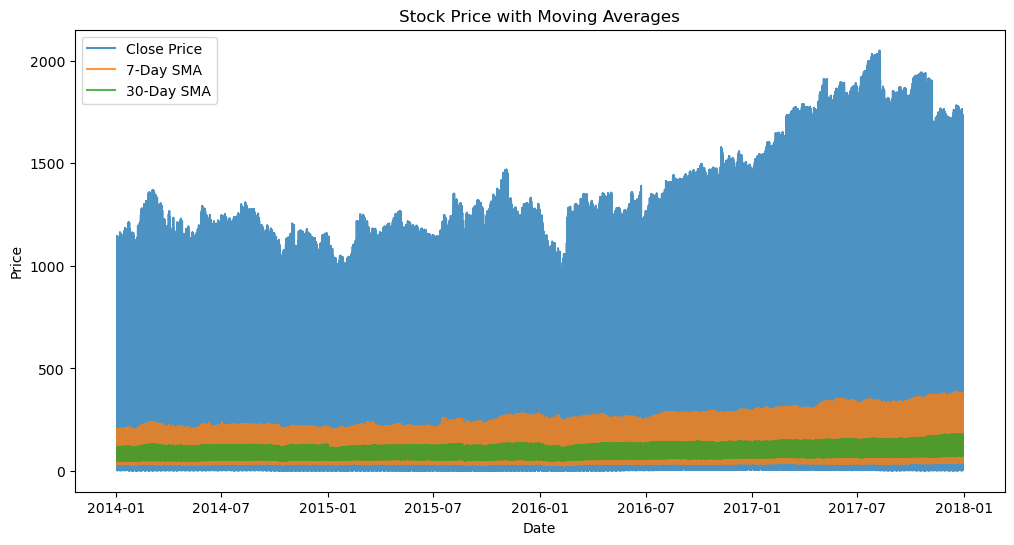

In [30]:
plt.figure(figsize=(12,6))  #Plotting Stock Price and Moving Averages:
plt.plot(data['close'],label='Close Price',alpha=0.8)
plt.plot(data['SMA_7'], label='7-Day SMA', alpha=0.8)
plt.plot(data['SMA_30'],label='30-Day SMA',alpha=0.8)
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.savefig('stock_price_plot.png') 
plt.show()

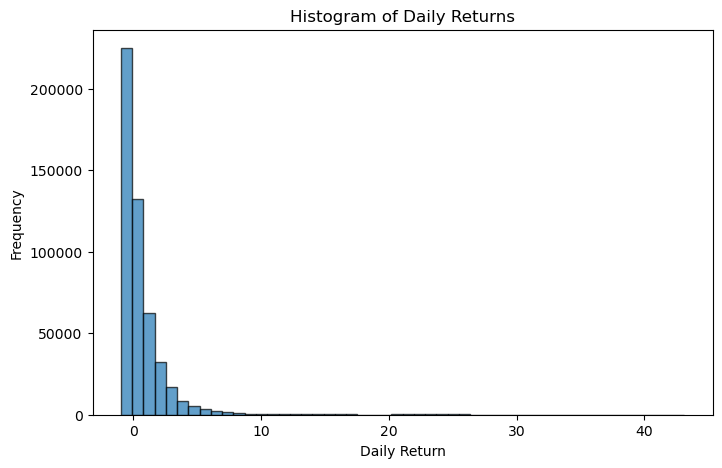

In [37]:
plt.figure(figsize=(8,5))#Histogram of 
plt.hist(data['Daily Return'].dropna(),bins=50,alpha=0.7,edgecolor='k')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

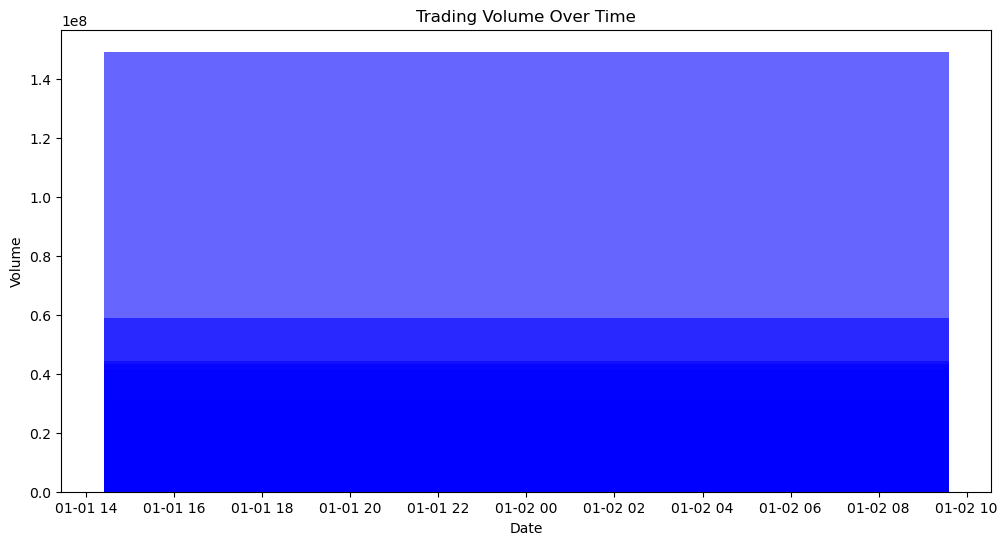

In [11]:
sampled_data = data.head(200)  # Adjusting the number of rows , since data is too big to plot
plt.figure(figsize=(12, 6))
plt.bar(sampled_data.index, sampled_data['volume'], color='blue', alpha=0.6)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [12]:
print("Max Closing Price:",data['close'].max())
print("Min Closing Price:",data['close'].min())
print("Average Daily Return:",data['Daily Return'].mean())
print("Volatality(Last 30 days):",data['Volatality'].iloc[-1])

Max Closing Price: 2049.0
Min Closing Price: 1.59
Average Daily Return: 0.6378277874021342
Volatality(Last 30 days): 1.6620281340030345


In [39]:
data.to_csv('analyzed_stock_data.csv')
plt.savefig('stock_price_plot.png')

<Figure size 640x480 with 0 Axes>